Job Status: job has successfully run


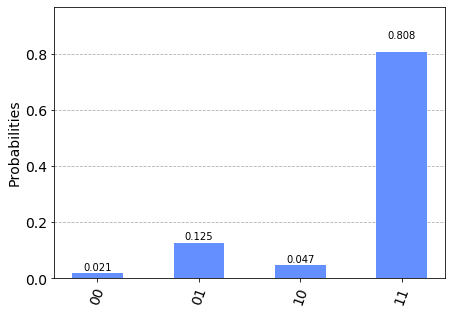

In [10]:
# implementation of grover's algorithm (unsorted search) with two qubits
# using IBM's quantum experience as a guide

from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

# initializing qubits and bits
qubits = QuantumRegister(2)
bits = ClassicalRegister(2)

# creating the circuit
circuit = QuantumCircuit(qubits, bits)

# BUILDING THE CIRCUIT
# putting the qubits into superposition
circuit.h(qubits[0])
circuit.h(qubits[1])
circuit.barrier()

# GROVER'S ALGORITHM START
# defining the oracle function that marks 11 as the "winner"
# by making its amplitude negative
circuit.h(qubits[1])
circuit.cx(qubits[0], qubits[1])
circuit.h(qubits[1])
circuit.barrier()

# grover diffusion operator that will increase amplitude of state 11 
# and decrease amplitudes of other states
circuit.h(qubits[0])
circuit.x(qubits[0])
circuit.h(qubits[1])
circuit.x(qubits[1])
circuit.h(qubits[1])
circuit.cx(qubits[0], qubits[1])
circuit.x(qubits[0])
circuit.h(qubits[1])
circuit.h(qubits[0])
circuit.x(qubits[1])
circuit.h(qubits[1])
circuit.barrier()

# taking measurements
circuit.measure(qubits, bits)

# simulating the algorithm
# simulator = Aer.get_backend('qasm_simulator')
# result = execute(circuit, backend = simulator, shots=1024).result()

# accessing IBM's quantum computers
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')

# running the algorithm
job = execute(circuit, backend=qcomp, shots=1024)
job_monitor(job)
result = job.result()

# plotting results
plot_histogram(result.get_counts(circuit))

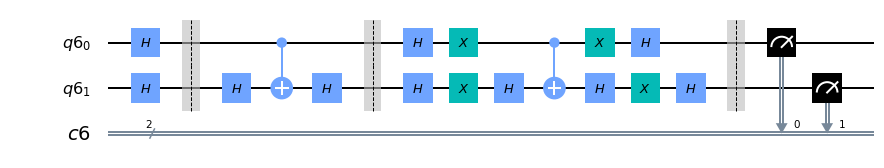

In [9]:
# drawing the circuit
circuit.draw(output='mpl')